# Пример, Kanji, критерий 1

Линия по производству пудры должна обеспечивать средний вес пудры в
упаковке 4 грамма, заявленное стандартное отклонение — 1 грамм.
В ходе инспекции выбрано 9 упаковок, средний вес продукта в них составляет
4.6 грамма.

$H_0$: средний вес пудры в упаковке соответствует норме.

$H_1$: средний вес пудры в упаковке не соответствует норме.

```p=0.0719```

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline

Проверим критерий "вручную":

$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}.$

$p(Z) = 2 \bigl(1-F(|Z|)\bigr).$

In [3]:
mu = 4
std = 1
n = 9
mean = 4.6

In [23]:
Z = (mean - mu)/(std/np.sqrt(n))
Z

1.799999999999999

In [24]:
def F(Z):
    return st.distributions.norm.cdf(Z)
2*(1 - F(1.7999))

0.07187642967867358

Просэмплируем похожую выборку и проверим критерий с использованием библиотеки ```statsmodels```

In [39]:
rs = np.random.RandomState(5)
X = rs.randn(n)*std + 4.3
np.mean(X), np.std(X)


(4.596429057120655, 1.0118035250351838)

In [71]:
from statsmodels.stats.weightstats import ztest
ztest(X, value=mu)

(-56.66568626602876, 0.0)

# Кобзарь, задача 227

Нормируемый уровень дефектных изделий в партии $p_0 = 0.05$. Среди 20 изделий
партии проверка обнаружила 2 дефектных.

$H_0$ : доля дефектных изделий в партии не выше нормы.

$H_1$ : доля дефектных изделий в партии выше нормы.

Для биномиального критерия ```p=0.2642```.

Проверим критерий "вручную":

$T = \sum X_i$

$p(T) = 1 - F(T)$ 

In [46]:
T = 2
n = 20
p = 0.05

In [47]:
def F(T):
    return st.distributions.binom(n, p).cdf(Z)
1 - F(T)

0.2641604750561505

Проверим критерий с использованием библиотеки ```scipy```

In [58]:
st.binom_test(2, n, p)

0.26416047505615026

In [69]:
from statsmodels.stats.proportion import binom_test

In [72]:
binom_test(T, n, p)

0.26416047505615026

# Антиконсервативность интервалов доверия

Построим график попадания параметра распределения Бернулли в 95%-доверительный интервал.

In [126]:
from statsmodels.stats.proportion import proportion_confint
N_exp = 500
n = 40
p_array =  np.arange(0.05,0.95,0.01)

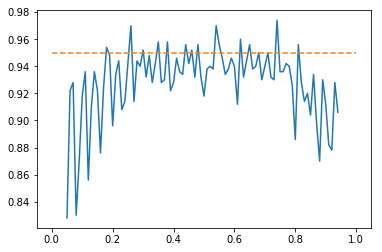

In [132]:
plot_Y = []
for p in p_array:
    
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        
        left, right =  (proportion_confint(X, n))
        if left<=p<=right:
            success+=1.0
    plot_Y.append(success/N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

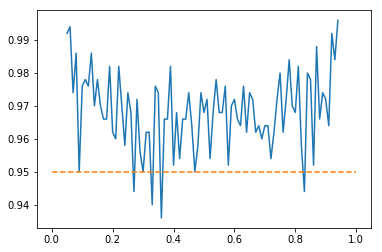

In [131]:
plot_Y = []
for p in p_array:
    
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        
        left, right =  (proportion_confint(X, n, method='beta'))
        if left<=p<=right:
            success+=1
    plot_Y.append(success/N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

# Бонд, продолжение

Пусть Бонд выбрал взболтанный мартини в 12 случаев из 16.

Требуется:
1. Проверить гипотезу о равнозначности мартини как можно бОльшим количеством способов.

2. Построить интервалы доверия

3. Построить зависимость мощности критерия от размера выборки для каждого из критериев

In [130]:
from statsmodels.stats.proportion import *
binom_test(12, 16, 0.5), proportions_chisquare(12, 16, 0.5), proportions_ztest(12, 16, 0.5)

(0.076812744140625,
 (4.0, 0.04550026389635857, (array([[12,  4]]), array([[8., 8.]]))),
 (2.3094010767585034, 0.020921335337794014))

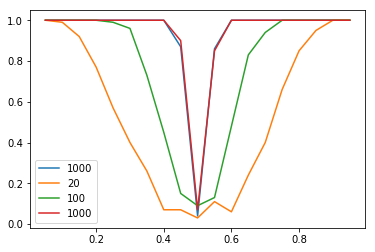

In [143]:
for n in [1000, 20, 100, 1000]:
    X = []
    Y = []
    for p in np.arange(0.05, 0.96, 0.05):
        success = 0
        for _ in range(100):
            x_ = np.random.binomial(n, p)
            if binom_test(x_, n, 0.5)<=0.05:
                success+=1
        X.append(p)
        Y.append(success/100)
    plt.plot(X,Y, label=str(n))
plt.legend(loc='best')
            
        

In [40]:
X_ = np.zeros(1000)
X_[:100] = 1.0
st.stats.kstest(X_, st.distributions.bernoulli(0.5).cdf)

KstestResult(statistic=0.5, pvalue=1.064517291557782e-231)

/usr/local/lib/python3.5/dist-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


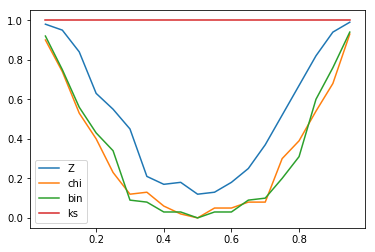

In [41]:
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare, binom_test
n = 10
def ztest(x_):
    return proportions_ztest(x_, n, 0.5)[1]<=0.05
        
def binom(x_):
    return binom_test(x_, n, 0.5)<=0.05

def chi(x_):
    return proportions_chisquare(x_, n, 0.5)[1]<=0.05

def ks(x_):
    X_ = np.zeros(n)
    X_[:x_] = 1.0
    return st.stats.kstest(X_, st.distributions.bernoulli(0.5).cdf)
    
for label, method in [('Z', ztest), ('chi', chi), ('bin', binom), ('ks', ks)]:
    X = []
    Y = []
    for p in np.arange(0.05, 0.96, 0.05):
        success = 0
        for _ in range(100):
            x_ = np.random.binomial(n, p)
            if method(x_):
                success+=1
        X.append(p)
        Y.append(success/100)
    plt.plot(X,Y, label=label)
plt.legend(loc='best')
            
        

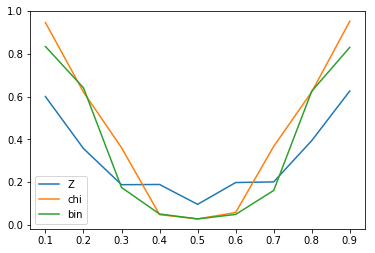

In [26]:
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare, binom_test
n = 10

def ztest(x, p):
    return proportions_ztest(x_, n,p)[1]<=0.05
        
def binom(x_, p):
    return binom_test(x_, n, p)<=0.05

def chi(x, p):
    return proportions_chisquare(x_, n, p)[1]<=0.05
    
for label, method in [('Z', ztest), ('chi', chi), ('bin', binom)]:
    X = []
    Y = []
    for p in np.arange(0.1, 0.91, 0.1):
        success = 0
        for _ in range(1000):
            x_ = np.random.binomial(n, 0.5)
            if method(x_,p):
                success+=1
        X.append(p)
        Y.append(success/1000)
    plt.plot(X,Y, label=label)
plt.legend(loc='best')
            
        

# TEST

In [1]:
import scipy.stats as st

In [2]:
with open ('/home/twlvth/Documents/statistics/psad-2020/homework_data/sem_2/kobzeva.an.csv') as f:
    samp = [float(n) for n in f.read().splitlines()]

In [5]:
samp_bin = [float(s > 0) for s in samp]

In [12]:
st.binom_test(sum(samp_bin), n=len(samp_bin))

7.850139645593666e-05